### Develop LSTM Models For Univariate Time Series Forecasting

In [1]:

# univariate lstm example
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten


In [16]:
from array import array
import numpy as np

In [2]:
# preparing independent and dependent features
def prepare_data(timeseries_data, n_features):
	X, y =[],[]
	for i in range(len(timeseries_data)):
		# find the end of this pattern
		end_ix = i + n_features
		# check if we are beyond the sequence
		if end_ix > len(timeseries_data)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = timeseries_data[i:end_ix], timeseries_data[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return np.array(X), np.array(y)

In [3]:
# define input sequence
timeseries_data = [110, 125, 133, 146, 158, 172, 187, 196, 210]
# choose a number of time steps
n_steps = 3
# split into samples
X, y = prepare_data(timeseries_data, n_steps)

In [4]:
print(X),print(y)

[[110 125 133]
 [125 133 146]
 [133 146 158]
 [146 158 172]
 [158 172 187]
 [172 187 196]]
[146 158 172 187 196 210]


(None, None)

In [5]:
X.shape

(6, 3)

In [7]:
# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
X

array([[[110],
        [125],
        [133]],

       [[125],
        [133],
        [146]],

       [[133],
        [146],
        [158]],

       [[146],
        [158],
        [172]],

       [[158],
        [172],
        [187]],

       [[172],
        [187],
        [196]]])

### Building LSTM Model

In [10]:

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, y, epochs=300, verbose=1)


Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 32431.5215
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 32269.5840
Epoch 3/300
1/1 [==============================] - 0s 15ms/step - loss: 32109.0000
Epoch 4/300
1/1 [==============================] - 0s 15ms/step - loss: 31948.8340
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 31789.1719
Epoch 6/300
1/1 [==============================] - 0s 13ms/step - loss: 31628.1719
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 31466.9941
Epoch 8/300
1/1 [==============================] - 0s 14ms/step - loss: 31301.0469
Epoch 9/300
1/1 [==============================] - 0s 19ms/step - loss: 31129.3340
Epoch 10/300
1/1 [==============================] - 0s 20ms/step - loss: 30950.2637
Epoch 11/300
1/1 [==============================] - 0s 18ms/step - loss: 30765.5527
Epoch 12/300
1/1 [==============================] - 0s 14ms/step - loss: 30573.0449
Epo

1/1 [==============================] - 0s 12ms/step - loss: 9.7139
Epoch 97/300
1/1 [==============================] - 0s 12ms/step - loss: 8.7784
Epoch 98/300
1/1 [==============================] - 0s 13ms/step - loss: 8.8755
Epoch 99/300
1/1 [==============================] - 0s 12ms/step - loss: 9.8930
Epoch 100/300
1/1 [==============================] - 0s 13ms/step - loss: 11.0943
Epoch 101/300
1/1 [==============================] - 0s 12ms/step - loss: 12.4628
Epoch 102/300
1/1 [==============================] - 0s 13ms/step - loss: 13.6825
Epoch 103/300
1/1 [==============================] - 0s 11ms/step - loss: 14.4737
Epoch 104/300
1/1 [==============================] - 0s 12ms/step - loss: 14.6401
Epoch 105/300
1/1 [==============================] - 0s 14ms/step - loss: 14.4213
Epoch 106/300
1/1 [==============================] - 0s 11ms/step - loss: 13.6301
Epoch 107/300
1/1 [==============================] - 0s 13ms/step - loss: 12.8139
Epoch 108/300
1/1 [==================

1/1 [==============================] - 0s 13ms/step - loss: 7.0301
Epoch 198/300
1/1 [==============================] - 0s 13ms/step - loss: 6.9786
Epoch 199/300
1/1 [==============================] - 0s 12ms/step - loss: 6.9707
Epoch 200/300
1/1 [==============================] - 0s 13ms/step - loss: 6.9551
Epoch 201/300
1/1 [==============================] - 0s 12ms/step - loss: 6.9178
Epoch 202/300
1/1 [==============================] - 0s 12ms/step - loss: 6.8310
Epoch 203/300
1/1 [==============================] - 0s 16ms/step - loss: 6.7938
Epoch 204/300
1/1 [==============================] - 0s 12ms/step - loss: 6.7481
Epoch 205/300
1/1 [==============================] - 0s 14ms/step - loss: 6.7011
Epoch 206/300
1/1 [==============================] - 0s 12ms/step - loss: 6.6436
Epoch 207/300
1/1 [==============================] - 0s 13ms/step - loss: 6.5738
Epoch 208/300
1/1 [==============================] - 0s 13ms/step - loss: 6.5072
Epoch 209/300
1/1 [=======================

1/1 [==============================] - 0s 13ms/step - loss: 3.1505
Epoch 299/300
1/1 [==============================] - 0s 13ms/step - loss: 3.1540
Epoch 300/300
1/1 [==============================] - 0s 13ms/step - loss: 3.1456


### Predicting For the next 10 data

In [28]:
# demonstrate prediction for next 10 days
x_input = np.array([187, 196, 210])
temp_input=list(x_input)
lst_output=[]
i=0
while(i<10):
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[224.25215]
1 day input [196.         210.         224.25215149]
1 day output [[236.05205]]
2 day input [210.         224.25215149 236.05204773]
2 day output [[250.09741]]
3 day input [224.25215 236.05205 250.09741]
3 day output [[263.85294]]
4 day input [236.05205 250.09741 263.85294]
4 day output [[277.201]]
5 day input [250.09741 263.85294 277.201  ]
5 day output [[291.5772]]
6 day input [263.85294 277.201   291.5772 ]
6 day output [[305.86478]]
7 day input [277.201   291.5772  305.86478]
7 day output [[320.37985]]
8 day input [291.5772  305.86478 320.37985]
8 day output [[335.39618]]
9 day input [305.86478 320.37985 335.39618]
9 day output [[350.69]]
[224.25215, 236.05205, 250.09741, 263.85294, 277.201, 291.5772, 305.86478, 320.37985, 335.39618, 350.69]


In [29]:
timeseries_data

[110, 125, 133, 146, 158, 172, 187, 196, 210]

In [30]:
len(timeseries_data)

9

In [31]:
lst_output

[224.25215,
 236.05205,
 250.09741,
 263.85294,
 277.201,
 291.5772,
 305.86478,
 320.37985,
 335.39618,
 350.69]

### Visualizaing The Output

In [33]:
import matplotlib.pyplot as plt

In [34]:
day_new=np.arange(1,10)
day_pred=np.arange(10,20)

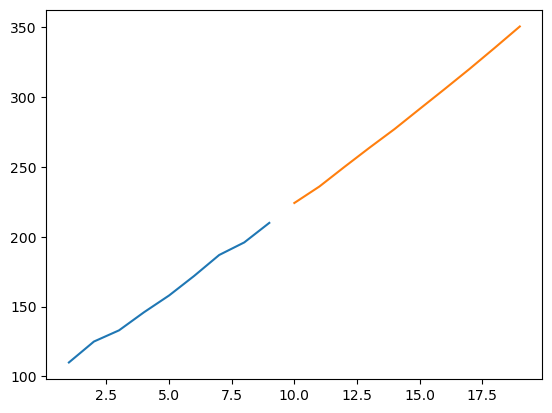

In [35]:
plt.plot(day_new,timeseries_data)
plt.plot(day_pred,lst_output)
